In this article we are going to predict number of building approvals of new houses in New South Wales (Australia)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ARIMA-model" data-toc-modified-id="ARIMA-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ARIMA model</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-download" data-toc-modified-id="Data-download-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data download</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Time-series-and-moving-average" data-toc-modified-id="Time-series-and-moving-average-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Time series and moving average</a></span></li><li><span><a href="#Stacionarity" data-toc-modified-id="Stacionarity-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Stacionarity</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#ARIMA-model-with-exogenous-variables" data-toc-modified-id="ARIMA-model-with-exogenous-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ARIMA model with exogenous variables</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Data-download" data-toc-modified-id="Data-download-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data download</a></span><ul class="toc-item"><li><span><a href="#Rent-prices-dataset" data-toc-modified-id="Rent-prices-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Rent prices dataset</a></span></li><li><span><a href="#Wage-index" data-toc-modified-id="Wage-index-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Wage index</a></span></li><li><span><a href="#Business-indicators" data-toc-modified-id="Business-indicators-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Business indicators</a></span></li><li><span><a href="#Loans---construction-and-real-purchase" data-toc-modified-id="Loans---construction-and-real-purchase-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Loans - construction and real purchase</a></span></li><li><span><a href="#Housing-finance" data-toc-modified-id="Housing-finance-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Housing finance</a></span></li><li><span><a href="#Households-Projection" data-toc-modified-id="Households-Projection-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Households Projection</a></span></li><li><span><a href="#Merging-partial-dataframes-together" data-toc-modified-id="Merging-partial-dataframes-together-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Merging partial dataframes together</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Lagging-function" data-toc-modified-id="Lagging-function-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Lagging function</a></span></li><li><span><a href="#Purchase-of-real-property-variable" data-toc-modified-id="Purchase-of-real-property-variable-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Purchase of real property variable</a></span></li><li><span><a href="#Wages-variable" data-toc-modified-id="Wages-variable-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Wages variable</a></span></li><li><span><a href="#Sales-variable" data-toc-modified-id="Sales-variable-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Sales variable</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# ARIMA model

## Introduction

All libraries used in this notebook.

In [1]:
# Libraries
import requests #used to provide http request to australian statistical bureau
import numpy as np #used for numerical calculations
import pandas as pd  #used for data storage and handling
from matplotlib import pyplot #used for basic data figures 

# jupyter notebook interactivity + user friendly interface 
import ipywidgets #used for interactivity and user friendly accesibility inside the jupyter notebook
from ipywidgets import interact #no need to use it elsewhere
from IPython.display import display #no need to use it elsewhere

# statistical modeling
from statsmodels.tsa.stattools import adfuller #time series stacionarity test
from statsmodels.tsa.seasonal import seasonal_decompose #time series seasonal decomposition
from statsmodels.tsa.stattools import acf, pacf #used for time series autocorrelation

import itertools
import warnings
import statsmodels.api as sm  

## Data download

We were provided with url to a dataset from Australian Bureau of Statistics. We will use standart library called requests. ABS is using a sdmx-json type. More info on https://pandasdmx.readthedocs.io/en/latest/ .

In [2]:
url = 'http://stat.data.abs.gov.au/sdmx-json/data/ABS_BA_SA2_ASGS2016/1.9.1...0+1+102+1GSYD+10201.M/all?detail=Full&amp;dimensionAtObservation=AllDimensions&amp;startPeriod=2011-07&amp;endPeriod=2017-07'

response = requests.get(url = url)

responseJson = response.json()

sender_name = responseJson['header']['sender']['name']
dataset_name = responseJson['structure']['name']
prepare_date = responseJson['header']['prepared']

In previous step we have created three variables sender_name, dataset_name, and prepare_date. Let's figure out what we are looking at. 

In [3]:
print('Source ' + sender_name  + ': ' + dataset_name + ' as of ' + prepare_date)

Source Australian Bureau of Statistics: Building Approvals by Statistical Area (SA2 and above) as of 2018-09-20T08:07:45.2630773Z


From link below we know more about data and we understand that there can be more data series and more optins. Let's see what options do we have in our data. 

In [4]:
import ipywidgets
from ipywidgets import interact
from IPython.display import display

# list of of dropdowns
dropdown_list = []

# we go through all series in dataset and 
for item in responseJson.get('structure').get('dimensions').get('series'):
    variable = []
    dropdown_name = item['name']
    
    for name in item['values']:
        variable.append(name['name'])       
    
    #create a dropdown for each option that we can choose
    dropdown = ipywidgets.Dropdown(description=dropdown_name, options=variable,  value=variable[0],button_style='')
    display(dropdown)
    
    dropdown_list.append(dropdown)



Dropdown(description='Measure', options=('Total number of dwelling units',), value='Total number of dwelling u…

Dropdown(description='Sector of Ownership', options=('Total Sectors',), value='Total Sectors')

Dropdown(description='Type of work', options=('New',), value='New')

Dropdown(description='Type of building', options=('Houses', 'Semi-detached, row or terrace houses, townhouses …

Dropdown(description='Geography Level', options=('Statistical Area Level 3', 'Statistical Area Level 4', 'Stat…

Dropdown(description='Region', options=('Gosford', 'Central Coast', 'New South Wales', 'Australia'), value='Go…

Dropdown(description='Frequency', options=('Monthly',), value='Monthly')

In [5]:
dropdown_list_indexes = []
dropdown_list_name = []

for selection in dropdown_list:
    dropdown_list_indexes.append(selection.index)
    dropdown_list_name.append(selection.value)
    
series_number = ':'.join(map(str,dropdown_list_indexes)) 
series_name = ' '.join(map(str,dropdown_list_name)) 

# Do we have chossen dataset series inside our downloaded json?
if series_number not in responseJson['dataSets'][0]['series'].keys():
    print('There is no such series. Please pick different values above.')
else: 
    print('You choose ' + series_name)    

You choose Total number of dwelling units Total Sectors New Houses States and Territories New South Wales Monthly


In following part, let's extract only the choosen series from whole dataset with time series as indexed id.  


In [6]:
#  export the chosen series number from the dataset
new_houses = [value[0] for key, value in responseJson['dataSets'][0]['series'][series_number]['observations'].items()]
# export time period data
time_series = [item for item in responseJson.get('structure').get('dimensions').get('observation') if item['id'] == 'TIME_PERIOD'][0]['values']

# create dataframe from time series list and convert date to datetime  
time_series = pd.DataFrame(time_series)
time_series['id'] = pd.to_datetime(time_series['id'], format='%Y-%m')

# create series with time index
new_houses_series = pd.Series(new_houses,index = time_series['id'])
new_houses_series = new_houses_series.resample('1MS').sum() #in case that in the dataset there are some missing months
new_houses_series.rename("Actual")
new_houses_series.head(5)

id
2011-07-01    1511.0
2011-08-01    1634.0
2011-09-01    1561.0
2011-10-01    1485.0
2011-11-01    1594.0
Freq: MS, dtype: float64

## Data Exploration   

### Time series and moving average

The figure below depicts a logarithmic trend as well as a seasonality. Seasonality is obvious and it looks it is repeating every 12 monhts.  This supports estimating an an ARIMA model with n order of integration. Let's test n order of integration. 

In [7]:
# original + moving average + seasinal decompose 
def data_exploration(data, moving_average_window = 12):
    
    moving_average = data.rolling(moving_average_window).mean()

    # original data and moving average    
    pyplot.figure(figsize=(18,6))
    pyplot.plot(data, label = 'original data')
    pyplot.plot(moving_average, 'r', label = 'moving average')
    pyplot.title(series_name)
    pyplot.legend(loc='upper left')       
    pyplot.xlabel('Years')
    pyplot.ylabel(dataset_name)
    pyplot.show()
    
    # By decomposing time series different parts are vsible
    # Visualize trend and seasonality
    result = seasonal_decompose(data, model= 'multiplicative')
    fig = pyplot.figure() 
    fig = result.plot()  
    fig.set_size_inches(16, 8)



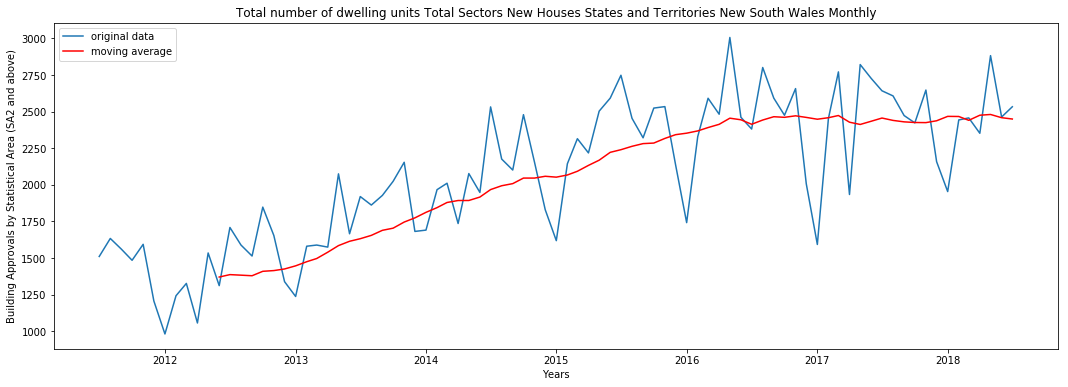

<Figure size 432x288 with 0 Axes>

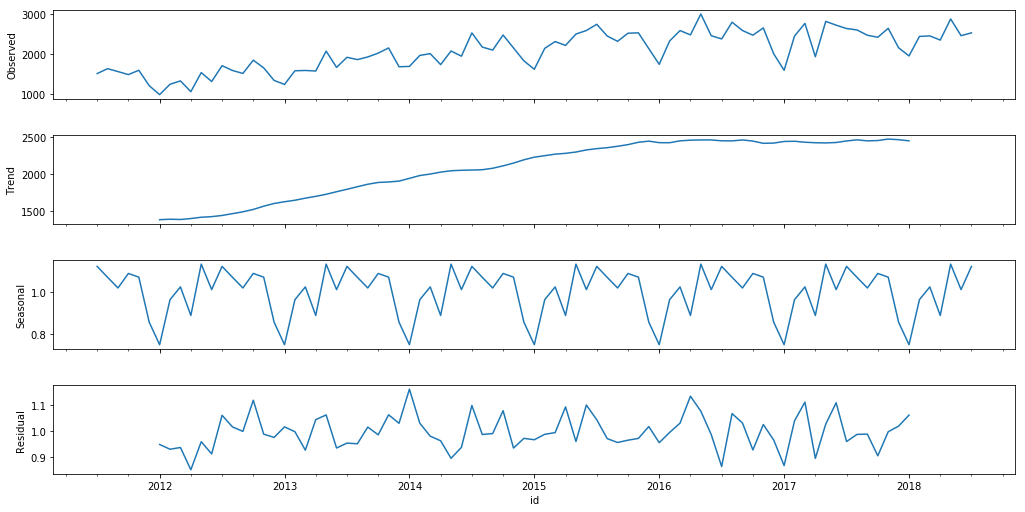

In [9]:
data_exploration(new_houses_series)    

### Stacionarity  

In [8]:
def stacionarity_find_order(data):
    order_difference_list = range(0, 12)

    warnings.filterwarnings("ignore")     
    for order in order_difference_list:
        # The Augmented Dickey-Fuller test 
        DFtest = adfuller(data.diff(order).dropna())
        if DFtest[1] <= 0.05:
            return order
            break
            
order = stacionarity_find_order(new_houses_series)            
print("The series is stacionarity after " + str(order) +  " order difference ")            


The series is stacionarity after 1 order difference 


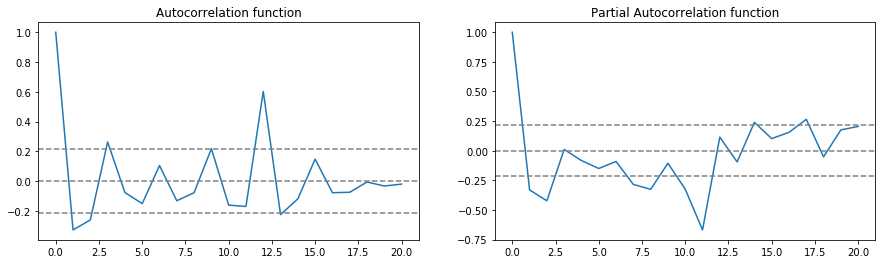

In [9]:
f, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15,4))

new_houses_series_fod = new_houses_series.diff(1).dropna()

ac_function = acf(new_houses_series_fod, nlags=20)
pac_function = pacf(new_houses_series_fod, nlags=20)


ax1.plot(ac_function)
ax1.set_title('Autocorrelation function')
ax1.axhline(y=0,ls='--',c='gray')
ax1.axhline(y=-1.96/np.sqrt(len(new_houses_series_fod)),ls='--',c='gray')
ax1.axhline(y=1.96/np.sqrt(len(new_houses_series_fod)),ls='--',c='gray')

ax2.plot(pac_function)
ax2.set_title('Partial Autocorrelation function')
ax2.axhline(y=0,ls='--',c='gray')
ax2.axhline(y=-1.96/np.sqrt(len(new_houses_series_fod)),ls='--',c='gray')
ax2.axhline(y=1.96/np.sqrt(len(new_houses_series_fod)),ls='--',c='gray')

From pictures above we expect order of the autoregressive model from 1 to 2.

## Model 

From Data Expolation section we understand that for one time series we can use ARIMA model with (d) order of integration = 1, (p) the order of the autoregressive model in range from 0 - 3 as well as (q) the order of the moving-average model. 

In [128]:
# function that is looking for the best model and the parameters setting
# lets try all combinations of p,d, and q


# root mean_square_error calculation
def MSE(model, Original_data):
    
    model_results = model.fit()
    # Original data frame      
    Original  = pd.DataFrame(Original_data)
    Original.columns = ['Actual']
    
    # Forecast series from model results    
    Forecast = pd.DataFrame(model_results.predict())
    Forecast.columns = ['Forecast']
    
    # Merge actual and forecast    
    Prediction=pd.merge(Original,Forecast, how='outer', left_index=True, right_index=True)
    Prediction['rmse_error'] = np.power(Prediction['Actual'] - Prediction['Forecast'],2)
    
    rmse_error  = np.sqrt(np.sum(Prediction['rmse_error']))
    return rmse_error
    
    
def find_best_model(p,d,q,data):
    
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings("ignore") 
    best_result = [(0,0,0),(0,0,0,0),100000000000000]
    forecast_error = best_result[2]
    for parameters in pdq:
        for parameters_seasonal in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(data, 
                                                  order=parameters, 
                                                  seasonal_order=parameters_seasonal,
                                                  trend='n')
                
                # Mean square error - prediction power calculation 
                # btw use scikitlearn mean_square_error ... my scikit learn is malfunctional  
                forecast_error = MSE(model, data)

                if forecast_error < best_result[2]:
                    best_result[0]=parameters 
                    best_result[1]=parameters_seasonal
                    best_result[2]=forecast_error  
                    
            except:
                continue
    print(forecast_error)
    return best_result

Let's find the model using function above.

In [129]:
order_of_intergration = range(0, 2)
AR_model_order  = MA_model_order = range(0, 2)

 

best_model_result = find_best_model(AR_model_order, order_of_intergration, MA_model_order, new_houses_series)
mod = sm.tsa.statespace.SARIMAX(new_houses_series, order=best_model_result[0], seasonal_order=best_model_result[1],trend='n')
my_model = mod.fit()
print(my_model.summary())


2396.09745212
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   85
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -563.943
Date:                            Thu, 20 Sep 2018   AIC                           1137.886
Time:                                    13:45:19   BIC                           1150.040
Sample:                                07-01-2011   HQIC                          1142.772
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1443      0.142      1.014      0.311      -0.135       0.423
ma.L1         -0.8046

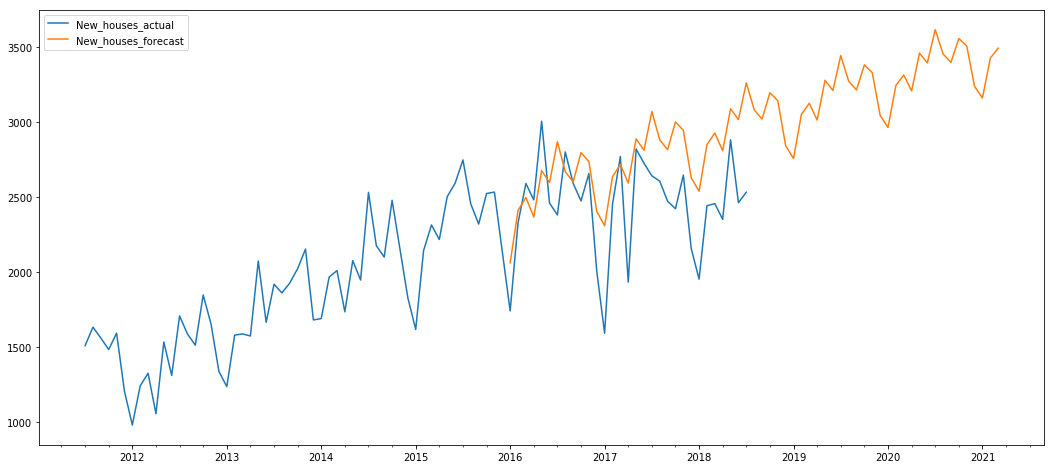

In [130]:
Actual  = pd.DataFrame(new_houses_series)
Actual.columns = ['New_houses_actual']
Forecast = pd.DataFrame(my_model.predict(start = '2016-01-01', end= '2021-03-01', dynamic= True))
Forecast.columns = ['New_houses_forecast']

Prediction=pd.merge(Actual, Forecast, how='outer', left_index=True, right_index=True)
Prediction.plot(figsize=(18, 8))

In [29]:
Prediction.tail(50)

,New_houses_actual,New_houses_forecast
2017-02-01,2453.0,2636.327246
2017-03-01,2771.0,2718.065019
2017-04-01,1934.0,2594.047600
2017-05-01,2821.0,2888.196226
2017-06-01,2726.0,2812.300351
2017-07-01,2642.0,3070.587209
2017-08-01,2607.0,2881.475738
2017-09-01,2473.0,2816.280784
2017-10-01,2423.0,3001.570657
2017-11-01,2647.0,2944.568156



## Result 

Variable ar.L1 has p-value greater than 0.05 and it suggests that we should omit the first order AR model from the model. Data from 2012 - 2016 are overweighting the logarithmic trend in year 2017 and 2018, therefore, our model is forecasting linear trend in next three years.

Next steps with the model:
- omit variables
- transform new_houses_series


In next chapter we can try to add exogenous variable to the model in order to explain a trend decline.

# ARIMA model with exogenous variables

In the case of exogenous variables, we are looking for variables that will correlate with our new houses dataset as well as lag or an  exogenous variable will correlate.

## Data preparation 

This time we going deeper into australian statistical bureau data. We will download more relevant data (from our perspective). Datasets as follow:
- rent price
- wage index
- sales in milions
- loans - construction and real purchase
- housing finance
- Households Projection

We will investigate correlation between the building approvals of new houses and lagged other time series in order to more accurately predict seasonality as well as trend. 

In [30]:
import requests
import json
import pandas as pd

## Data download

In [31]:
import requests
import xml.etree.ElementTree as ET

def get_ABS_datasets_info():
    api_uri = 'http://stat.data.abs.gov.au/restsdmx/sdmx.ashx/GetDataStructure/all'

    response = requests.get(api_uri)
    root = ET.fromstring(response._content)

    datasets = []
    for element in root.iter():
        if 'id' and 'agencyID' in element.keys():
            datasets.append({
                'id': element.attrib['id'],
                'agencyID': element.attrib['agencyID']
            })

    return datasets

def get_colnames(metadata):
    # returns supposed column names for dataframe based on
    # metadata input
    colnames = []
    colnames.append('Value')
    if 'series' in metadata.keys():
        # colname for time label
        colnames.append(metadata['observation'][0]['id'])
        for item in metadata['series']:
            colnames.append(item['name'])
    else:
        for item in metadata['observation']:
            colnames.append(item['name'])

    return colnames

def transform_series_data(data, metadata):
    ### radsej to prerobit na dve funkce - time series a not time series
    dataset = []

    for s_key, s_item in data.items():
        metadata_indices = [(i, int(x)) for i, x in enumerate(s_key.split(':'))]
        for o_key, o_item in s_item['observations'].items():
            data_row = []
            # append measure value
            data_row.append(o_item[0])
            # append time key
            data_row.append(metadata['observation'][0]['values'][int(o_key)]['name'])
            # append all other category columns data
            for index in metadata_indices:
                data_row.append(metadata['series'][index[0]]['values'][index[1]]['name'])
            dataset.append(data_row)

    return dataset

def transform_data(data, metadata):
    dataset = []
    for o_key, o_item in data['observations'].items():
        data_row = []
        metadata_indices = [(i, int(x)) for i, x in enumerate(o_key.split(':'))]
        data_row.append(o_item[0])
        for index in metadata_indices:
            data_row.append(metadata['observation'][index[0]]['values'][index[1]]['name'])
        dataset.append(data_row)

    return dataset

def prepare_dataset(response_json):
    # based on repsponse json from calling API URI
    # converts data into nested list format ready for
    # pandas dataframe, returns also list of column names
    # returns tuple(nested_data_list, colnames_list)
    metadata = response_json['structure']['dimensions']
    colnames = get_colnames(metadata)

    if 'series' in metadata.keys():
        data = response_json['dataSets'][0]['series']
        dataset = transform_series_data(data, metadata)
    else:
        data = response_json['dataSets'][0]
        dataset = transform_data(data, metadata)

    return (dataset, colnames)

### Rent prices dataset ###

In [32]:
rent_url = 'http://stat.data.abs.gov.au/sdmx-json/data/ABS_CENSUS2011_T24/01_02+03+04_05+06_07+08+09_10+11_13+14_17+18+19+20+Z.04+05+09+10+01_02+03+06+07+08+11+12+13+14_17+18+Z.1.STE.1.A/all?detail=Full&dimensionAtObservation=AllDimensions'

In [33]:
response = requests.get(rent_url)
data_json = json.loads(response.content)

print(data_json['header']['sender']['name'])
print(data_json['structure']['name'])
print(data_json['header']['prepared'])

Australian Bureau of Statistics
T24 Total Household Income (weekly) by Rent (weekly)
2018-09-20T10:42:26.7808442Z


In [34]:
dataset, colnames = prepare_dataset(data_json)
rent = pd.DataFrame(data=dataset, columns=colnames)

In [35]:
rent.head()

,Value,Rent (weekly),Total Family Income (weekly),State,Region Type,ASGS 2011,Frequency,Time
0,25267.0,$0-$74,$200-$299,New South Wales,States and Territories,New South Wales,Annual,2001
1,25282.0,$0-$74,$200-$299,New South Wales,States and Territories,New South Wales,Annual,2006
2,5756.0,$0-$74,$200-$299,New South Wales,States and Territories,New South Wales,Annual,2011
3,6839.0,$75-$99,$200-$299,New South Wales,States and Territories,New South Wales,Annual,2001
4,5763.0,$75-$99,$200-$299,New South Wales,States and Territories,New South Wales,Annual,2006


Rent prices are from census, which are held usually only once in couple of years, so this data won't be available for our model in the future. It is also annual and categorical which might not be suitable for the model.

### Wage index ###

In [36]:
wage_url = 'http://stat.data.abs.gov.au/sdmx-json/data/LABOUR_PRICE_INDEX/1+2+3.THRPEB.1+2+7.-.1.10+20+30.Q/all?detail=Full&dimensionAtObservation=AllDimensions'

In [37]:
response = requests.get(wage_url)
data_json = json.loads(response.content)

In [38]:
dataset, colnames = prepare_dataset(data_json)
wage = pd.DataFrame(data=dataset, columns=colnames)
wage.head()

,Value,Measure,Index type,Sector,Industry,Region,Adjustment type,Frequency,Time
0,67.9,Index number,Total hourly rates of pay excluding bonuses,Private,All industries,New South Wales,Original,Quarterly,Sep-1997
1,68.4,Index number,Total hourly rates of pay excluding bonuses,Private,All industries,New South Wales,Original,Quarterly,Dec-1997
2,69.0,Index number,Total hourly rates of pay excluding bonuses,Private,All industries,New South Wales,Original,Quarterly,Mar-1998
3,69.2,Index number,Total hourly rates of pay excluding bonuses,Private,All industries,New South Wales,Original,Quarterly,Jun-1998
4,70.0,Index number,Total hourly rates of pay excluding bonuses,Private,All industries,New South Wales,Original,Quarterly,Sep-1998


### Business indicators ###

In [39]:
indicators_url = 'http://stat.data.abs.gov.au/sdmx-json/data/QBIS/10+20+30+40+50+60+70+80+90+100+110+120+130+140+150+160+170.TOTAL.1.2+3+99.10+20+30.Q/all?detail=Full&dimensionAtObservation=AllDimensions&startPeriod=2011'

In [40]:
response = requests.get(indicators_url)
data_json = json.loads(response.content)
dataset, colnames = prepare_dataset(data_json)
indicators = pd.DataFrame(data=dataset, columns=colnames)

In [41]:
indicators.head()

,Value,Measure,Industry,Region,Business Scope,Adjustment Type,Frequency,Time
0,160312.4,Sales ($ Million),Total,New South Wales,TOTAL,Original,Quarterly,Mar-2011
1,172636.1,Sales ($ Million),Total,New South Wales,TOTAL,Original,Quarterly,Jun-2011
2,177729.3,Sales ($ Million),Total,New South Wales,TOTAL,Original,Quarterly,Sep-2011
3,181273.9,Sales ($ Million),Total,New South Wales,TOTAL,Original,Quarterly,Dec-2011
4,169206.4,Sales ($ Million),Total,New South Wales,TOTAL,Original,Quarterly,Mar-2012


In [42]:
indicators['Measure'].value_counts()

Wages                90
Sales (% Change)     90
Wages, % Change      90
Sales ($ Million)    90
Name: Measure, dtype: int64

indicators dataframe contains 4 measures in single 'Measure' column. For purposue of modelling we would like to have dataframe with 4 distinct measure columns, indexed by time. Let's do the transformation.

In [43]:
# extract just unique time values into new dataframe - this will be our result df we will work with further once built
indicators_result = pd.DataFrame(indicators['Time'].unique(), columns=['Time'])
indicators_result.head()

,Time
0,Mar-2011
1,Jun-2011
2,Sep-2011
3,Dec-2011
4,Mar-2012


In [44]:
# extract dataframe containing 'Values' and 'Time' - filtered for each unique measure
# rename column 'Value' to measure name and join this df to result df
total_ind = indicators[indicators['Adjustment Type'] == 'Original']
for measure in total_ind['Measure'].unique():
    merge_ind = total_ind[['Value', 'Time']][total_ind['Measure'] == measure].rename(columns = {'Value':measure})
    indicators_result = pd.merge(indicators_result, merge_ind, on='Time')

In [45]:
indicators_result.set_index('Time', inplace=True)
indicators_result.head()

,Sales ($ Million),Sales (% Change),Wages,"Wages, % Change"
Time,,,,
Mar-2011,160312.4,-7.8,34958.4,-4.2
Jun-2011,172636.1,7.7,36876.9,5.5
Sep-2011,177729.3,3.0,37345.1,1.3
Dec-2011,181273.9,2.0,37961.6,1.7
Mar-2012,169206.4,-6.7,36893.3,-2.8


### Loans - construction and real purchase ###

Below api url is extracting loans info since 2011 for whole Australia with purpose 'Purchase real propery' and 'Construction finance'. Unfortunately there are no values for New South Wales specificaly.

In [46]:
loans_url = 'http://stat.data.abs.gov.au/sdmx-json/data/LENDING_BY_PURPOSE/1+2+3+4.1+2.99+10+90+36+37+96.CONS+PROP.0.M/all?detail=Full&dimensionAtObservation=AllDimensions&startPeriod=2011'

In [47]:
response = requests.get(loans_url)
data_json = json.loads(response.content)
dataset, colnames = prepare_dataset(data_json)
loans = pd.DataFrame(data=dataset, columns=colnames)

In [48]:
loans.head()

,Value,Finance Type,Measure,Lender,Purpose,Region,Frequency,Time
0,5588304.0,Commercial Finance,Value of Commitments ($'000),All Lenders,Purchase of real property,Australia,Monthly,Jan-2011
1,6133539.0,Commercial Finance,Value of Commitments ($'000),All Lenders,Purchase of real property,Australia,Monthly,Feb-2011
2,7374784.0,Commercial Finance,Value of Commitments ($'000),All Lenders,Purchase of real property,Australia,Monthly,Mar-2011
3,6740188.0,Commercial Finance,Value of Commitments ($'000),All Lenders,Purchase of real property,Australia,Monthly,Apr-2011
4,8370865.0,Commercial Finance,Value of Commitments ($'000),All Lenders,Purchase of real property,Australia,Monthly,May-2011


In [49]:
loans['Value'].isnull().value_counts()

False    407
True     139
Name: Value, dtype: int64

There are 139 missing values in total

In [50]:
loans['Value'][loans['Purpose'] =='Purchase of real property'].isnull().value_counts()

False    273
Name: Value, dtype: int64

However these are only for 'Construction finance' purpose, so we can use 'Purchase of real property' at least

In [51]:
loans_result = loans[['Value', 'Time']][(loans['Purpose'] =='Purchase of real property') & (loans['Lender'] == 'All Lenders')]
loans_result.rename(columns = {'Value':'Purchase of real property'}, inplace=True)
loans_result.set_index('Time', inplace=True)
loans_result.head()

,Purchase of real property
Time,
Jan-2011,5588304.0
Feb-2011,6133539.0
Mar-2011,7374784.0
Apr-2011,6740188.0
May-2011,8370865.0


### Housing finance ###

Dataset HF should contain measures related to Finance used for housing, I have filtered Data Item 'Finance for the construction of dwellings', which looks promising for the model.

In [52]:
housing_finance_url = 'http://stat.data.abs.gov.au/sdmx-json/data/HF/1+2+3+4+5.1.10+99+90+31+61+92+93.10+20+30.120_23.M/all?detail=Full&dimensionAtObservation=AllDimensions'

In [53]:
response = requests.get(housing_finance_url)
data_json = json.loads(response.content)

dataset, colnames = prepare_dataset(data_json)
housing_finance = pd.DataFrame(data=dataset, columns=colnames)
housing_finance.head()

,Value,Measure,Region,Lender,Adjustment Type,Data Item,Frequency,Time
0,768.0,Number of Commitments,New South Wales,Banks,Original,Finance for the construction of dwellings,Monthly,Oct-1975
1,669.0,Number of Commitments,New South Wales,Banks,Original,Finance for the construction of dwellings,Monthly,Nov-1975
2,592.0,Number of Commitments,New South Wales,Banks,Original,Finance for the construction of dwellings,Monthly,Dec-1975
3,545.0,Number of Commitments,New South Wales,Banks,Original,Finance for the construction of dwellings,Monthly,Jan-1976
4,619.0,Number of Commitments,New South Wales,Banks,Original,Finance for the construction of dwellings,Monthly,Feb-1976


Let's check if there are values missing

In [54]:
housing_finance['ValueIsNull'] = housing_finance['Value'].isnull()
housing_finance['Year'] = housing_finance['Time'].apply(lambda x: x[-4:])

In [55]:
null_counts = housing_finance[['ValueIsNull', 'Year']].groupby('Year').sum()
null_counts[null_counts['ValueIsNull'] > 0]

,ValueIsNull
Year,
1975,8.0
1995,48.0
1996,96.0
1997,96.0
1998,96.0
1999,96.0
2000,180.0
2001,240.0
2002,266.0


Unfortunately since 1995 the data is missing so it is not useful for modelling

### Households Projection ###

In [56]:
household_proj_url = 'http://stat.data.abs.gov.au/sdmx-json/data/ABS_HH_PROV/1.1_2+4+32+31.1+2+3.A/all?detail=Full&dimensionAtObservation=AllDimensions'

In [57]:
response = requests.get(household_proj_url)
data_json = json.loads(response.content)
dataset, colnames = prepare_dataset(data_json)
housing_proj = pd.DataFrame(data=dataset, columns=colnames)
housing_proj.head()

,Value,Region,Household Type,Projection Assumption,Frequency,Time
0,652662.0,New South Wales,Lone person households,Series III,Annual,2011
1,665321.0,New South Wales,Lone person households,Series III,Annual,2012
2,677596.0,New South Wales,Lone person households,Series III,Annual,2013
3,690458.0,New South Wales,Lone person households,Series III,Annual,2014
4,703663.0,New South Wales,Lone person households,Series III,Annual,2015


We would like 3 columns - one or each Projection Assumption, indexed by Time, let's start transformation

In [58]:
# Similar technique as in Busines indicators transformation
housing_proj_total = housing_proj[housing_proj['Household Type'] == 'Total households']
housing_proj_result = pd.DataFrame(housing_proj_total['Time'].unique(), columns=['Time'])
for assump in housing_proj_total['Projection Assumption'].unique():
    merge_proj = housing_proj_total[['Value', 'Time']][housing_proj_total['Projection Assumption'] == assump].rename(columns = {'Value':'Household projection-'+ assump})
    housing_proj_result = pd.merge(housing_proj_result, merge_proj, on='Time')

In [59]:
housing_proj_result['Time'] = housing_proj_result['Time'].apply(lambda x: 'Jan-' + x)

In [60]:
housing_proj_result.set_index('Time', inplace=True)

### Merging partial dataframes together ###

indicators_result, loans_result, housing_proj_result

In [61]:
approved_houses_url = 'http://stat.data.abs.gov.au/sdmx-json/data/ABS_BA_SA2_ASGS2016/1.9.1...0+1+102+1GSYD+10201.M/all?detail=Full&amp;dimensionAtObservation=AllDimensions&amp;startPeriod=2011-07&amp;endPeriod=2017-07'

In [62]:
response = requests.get(approved_houses_url)
data_json = json.loads(response.content)
dataset, colnames = prepare_dataset(data_json)
approved_houses = pd.DataFrame(data=dataset, columns=colnames)
approved_houses.head()

,Value,TIME_PERIOD,Measure,Sector of Ownership,Type of work,Type of building,Geography Level,Region,Frequency
0,14.0,Jul-2011,Total number of dwelling units,Total Sectors,New,Houses,Statistical Area Level 3,Gosford,Monthly
1,17.0,Aug-2011,Total number of dwelling units,Total Sectors,New,Houses,Statistical Area Level 3,Gosford,Monthly
2,21.0,Sep-2011,Total number of dwelling units,Total Sectors,New,Houses,Statistical Area Level 3,Gosford,Monthly
3,15.0,Oct-2011,Total number of dwelling units,Total Sectors,New,Houses,Statistical Area Level 3,Gosford,Monthly
4,15.0,Nov-2011,Total number of dwelling units,Total Sectors,New,Houses,Statistical Area Level 3,Gosford,Monthly


In [63]:
approved_houses['Region'].unique()

array(['Gosford', 'Central Coast', 'New South Wales', 'Australia'], dtype=object)

In [64]:
houses_final = approved_houses[['Value', 'TIME_PERIOD']][(approved_houses['Region'] == 'New South Wales') & (approved_houses['Type of building'] == 'Houses')]

In [65]:
houses_final.head()

,Value,TIME_PERIOD
1700,1511.0,Jul-2011
1701,1634.0,Aug-2011
1702,1561.0,Sep-2011
1703,1485.0,Oct-2011
1704,1594.0,Nov-2011


In [66]:
houses_final.rename(columns = {'Value': 'Approved houses', 'TIME_PERIOD':'Time'}, inplace=True)
houses_final.set_index('Time', inplace=True)

In [67]:
houses_final.head()

,Approved houses
Time,
Jul-2011,1511.0
Aug-2011,1634.0
Sep-2011,1561.0
Oct-2011,1485.0
Nov-2011,1594.0


In [68]:
from functools import reduce
join_list = [houses_final, indicators_result, loans_result, housing_proj_result]
final_df = reduce(lambda left, right: left.join(right, how='left'), join_list)

In [69]:
final_df.head()

,Approved houses,Sales ($ Million),Sales (% Change),Wages,"Wages, % Change",Purchase of real property,Household projection-Series I,Household projection-Series III,Household projection-Series II
Time,,,,,,,,,
Jul-2011,1511.0,NaN,NaN,NaN,NaN,7429177.0,NaN,NaN,NaN
Aug-2011,1634.0,NaN,NaN,NaN,NaN,8026430.0,NaN,NaN,NaN
Sep-2011,1561.0,177729.3,3.0,37345.1,1.3,7338336.0,NaN,NaN,NaN
Oct-2011,1485.0,NaN,NaN,NaN,NaN,6945978.0,NaN,NaN,NaN
Nov-2011,1594.0,NaN,NaN,NaN,NaN,8386799.0,NaN,NaN,NaN


Below is optional part of modifing index value to format YYYY-MM, for better sorting

In [70]:
def change_time_format(time_label):
    month_mapping = {'Jan': '01',
                 'Feb': '02',
                 'Mar': '03',
                 'Apr': '04',
                 'May': '05',
                 'Jun': '06',
                 'Jul': '07',
                 'Aug': '08',
                 'Sep': '09',
                 'Oct': '10',
                 'Nov': '11',
                 'Dec': '12'}
    
    parts = time_label.split('-')
    num_month = month_mapping[parts[0]]
    return parts[1] + '-' + num_month
    

In [71]:
index = final_df.index.tolist()
index_mod = list(map(change_time_format, index))

In [72]:
final_df.index = pd.to_datetime(index_mod, format='%Y-%m')

In [73]:
final_df.sort_index(inplace=True)
final_df.head(5)

,Approved houses,Sales ($ Million),Sales (% Change),Wages,"Wages, % Change",Purchase of real property,Household projection-Series I,Household projection-Series III,Household projection-Series II
2011-07-01,1511.0,NaN,NaN,NaN,NaN,7429177.0,NaN,NaN,NaN
2011-08-01,1634.0,NaN,NaN,NaN,NaN,8026430.0,NaN,NaN,NaN
2011-09-01,1561.0,177729.3,3.0,37345.1,1.3,7338336.0,NaN,NaN,NaN
2011-10-01,1485.0,NaN,NaN,NaN,NaN,6945978.0,NaN,NaN,NaN
2011-11-01,1594.0,NaN,NaN,NaN,NaN,8386799.0,NaN,NaN,NaN


Indicators data are quarterly and households projection yearly, so there is need to apply some logic to fill in the months inbetween. For start, let's group it on quarter level.

In [146]:
# convert from monthly dataset to quarterly dataset
final_df_quarter = final_df.groupby(pd.TimeGrouper(freq='Q')).sum() 
final_df_quarter.head(5)

,Approved houses,Sales ($ Million),Sales (% Change),Wages,"Wages, % Change",Purchase of real property,Household projection-Series I,Household projection-Series III,Household projection-Series II
2011-09-30,4706.0,177729.3,3.0,37345.1,1.3,22793943.0,0.0,0.0,0.0
2011-12-31,4286.0,181273.9,2.0,37961.6,1.7,23750467.0,0.0,0.0,0.0
2012-03-31,3552.0,169206.4,-6.7,36893.3,-2.8,21723968.0,2728375.0,2726969.0,2726969.0
2012-06-30,3904.0,177234.5,4.7,38104.5,3.3,25786874.0,0.0,0.0,0.0
2012-09-30,4812.0,176088.5,-0.6,37229.2,-2.3,24696164.0,0.0,0.0,0.0


## Data exploration

Some of our data are in available only in quarter. Let's investigate them to figure out if we should take them into account.

In [148]:
# original dataset
actual_houses =  final_df.loc[:'2018-03-31',['Approved houses']]

### Lagging function 

Looking for correlation amongs lagged time serise.

In [79]:
def find_lags_correlation(main_series, lagged_series, number_of_lags = 12):
    
    correlation = []
    
    for lag in range(1,number_of_lags):
        lag_series = lagged_series.shift(lag)
        correlation.append(main_series.corr(lag_series))
    
    return correlation

###  Purchase of real property variable

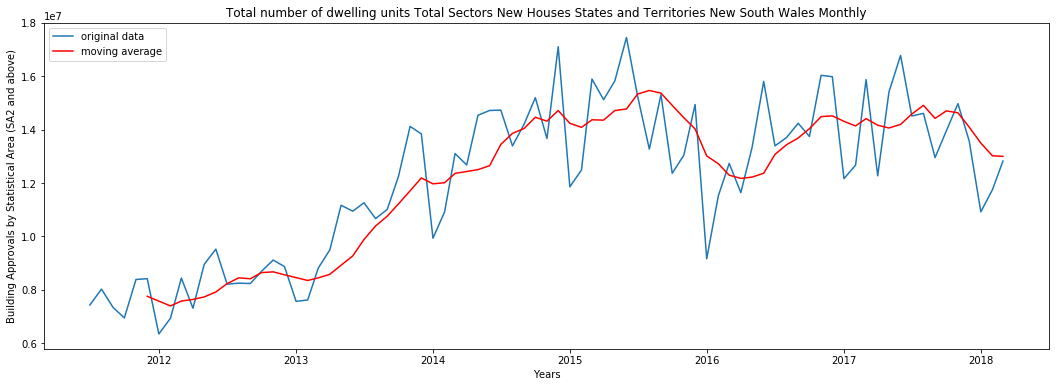

Max correlation in period 11.


<Figure size 432x288 with 0 Axes>

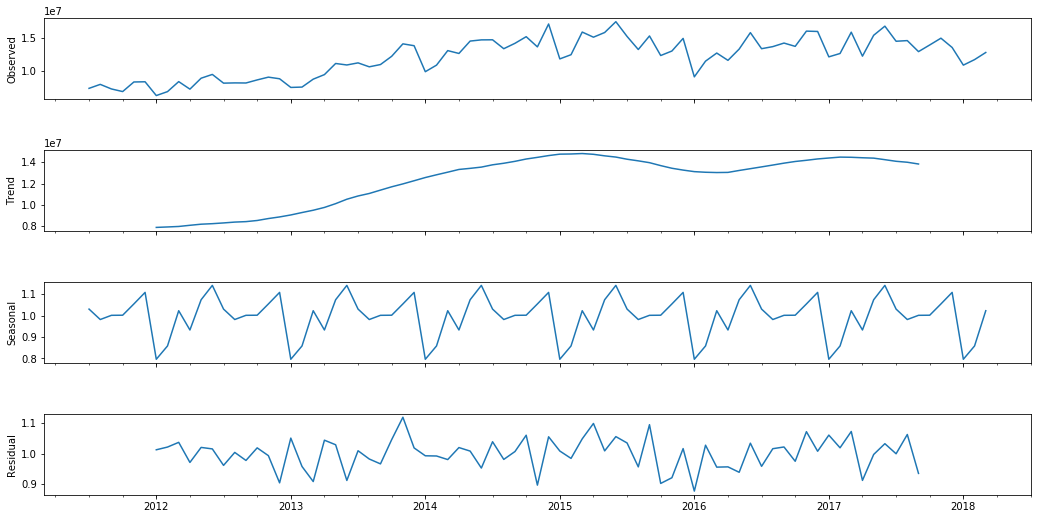

In [167]:
purchase = final_df.loc[:'2018-03-31','Purchase of real property']
data_exploration(test,6)
# looking for the most correlated lag of Purchase of real property series
correl = find_lags_correlation(final_df['Approved houses'],purchase,number_of_lags=36) 

correlpurchasemax = correl.index(max(correl)) + 1

print('Max correlation in period ' +  str(correlpurchasemax) + '.')


Logarithmic trend and lag4 (means 4 quarters shift) is highly correlated 0.92472915067626127. This looks promising.

###  Wages variable

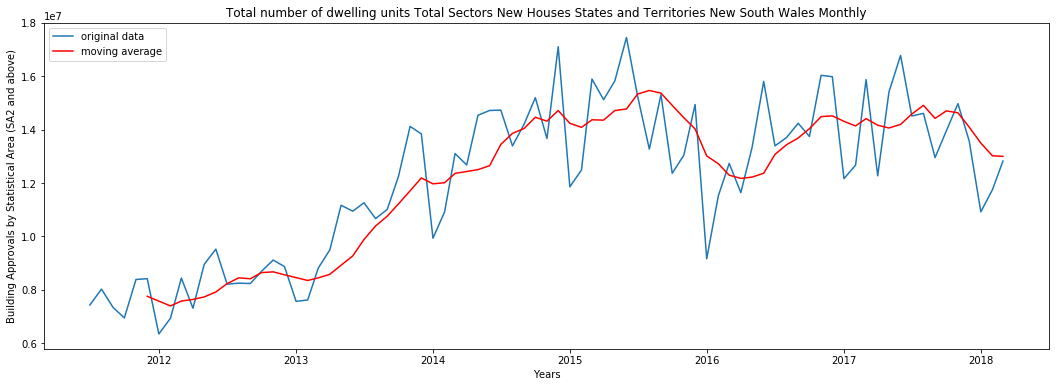

Max correlation in quarter 4.


<Figure size 432x288 with 0 Axes>

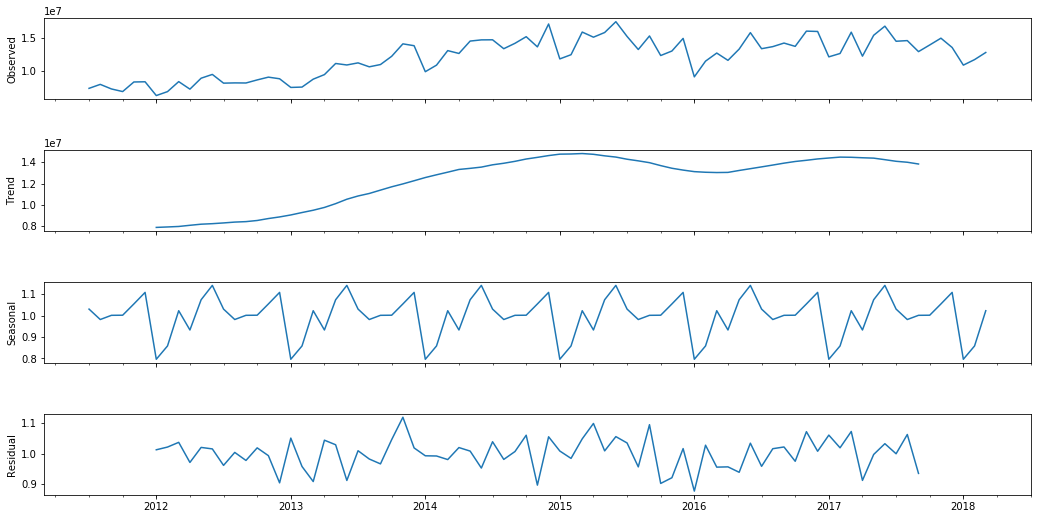

In [168]:
wages = final_df_quaterly.loc[:'2018-03-31','Wages']
data_exploration(test,6)
# looking for the most correlated lag of wages series
correl = find_lags_correlation(final_df_quaterly['Approved houses'],wages) 

correlwagesmax = correl.index(max(correl)) + 1

print('Max correlation in quarter ' +  str(correlwagesmax) + '.')

###  Sales variable

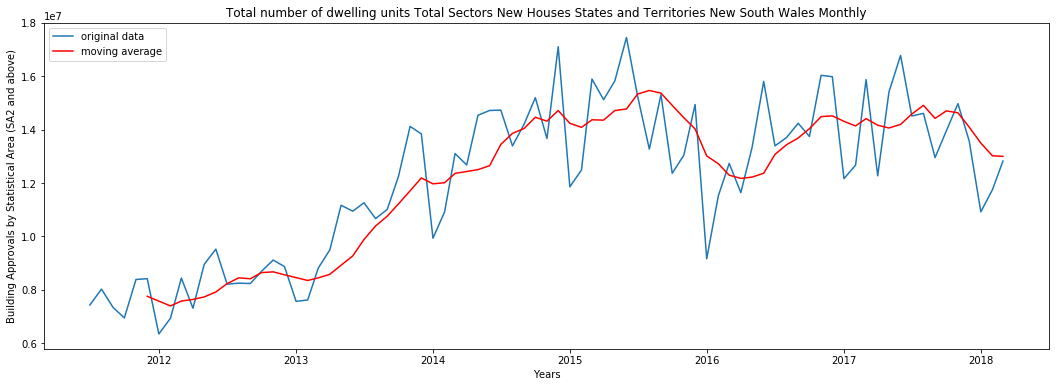

Max correlation in quarter 4.


<Figure size 432x288 with 0 Axes>

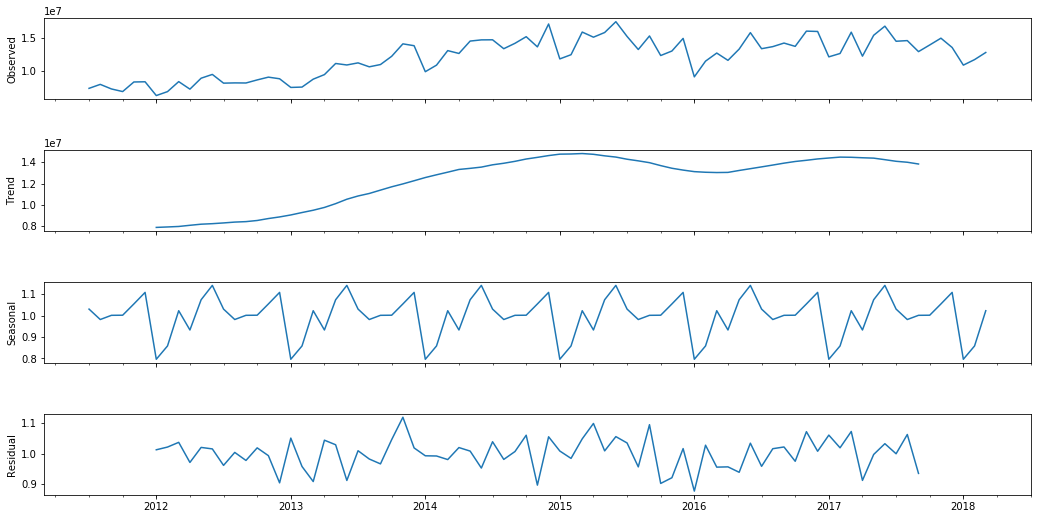

In [169]:
sales = final_df_quaterly.loc[:'2018-03-31','Sales ($ Million)']
data_exploration(test,6)
# looking for the most correlated lag of sales series
correl = find_lags_correlation(final_df_quaterly['Approved houses'],sales) 

correlsalesmax = correl.index(max(correl)) + 1

print('Max correlation in quarter ' +  str(correlsalesmax) + '.')

## Model 

Purchase of real property looks highly correlated, moreover it copies the trend of actual new houses. 

In [149]:
# function that is looking for the best model and the parameters setting
# lets try all combinations of p,d, and q


# root mean_square_error calculation
def MSE(model, Original_data):
    
    model_results = model.fit()
    # Original data frame      
    Original  = pd.DataFrame(Original_data)
    Original.columns = ['Actual']
    
    # Forecast series from model results    
    Forecast = pd.DataFrame(model_results.predict())
    Forecast.columns = ['Forecast']
    
    # Merge actual and forecast    
    Prediction=pd.merge(Original,Forecast, how='outer', left_index=True, right_index=True)
    Prediction['rmse_error'] = np.power(Prediction['Actual'] - Prediction['Forecast'],2)
    
    rmse_error  = np.sqrt(np.sum(Prediction['rmse_error']))
    return rmse_error
    
    
def find_best_model_exog_var(p,d,q,data,exog_var):
    
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings("ignore") 
    best_result = [(0,0,0),(0,0,0,0),100000000000000]
    forecast_error = best_result[2]
    for parameters in pdq:
        for parameters_seasonal in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(data, 
                                                  order=parameters, 
                                                  seasonal_order=parameters_seasonal,
                                                  exog = exog_var,
                                                  trend='n'
                                                 )
                
                # Mean square error - prediction power calculation 
                # btw use scikitlearn mean_square_error ... my scikit learn is malfunctional  
                forecast_error = MSE(model, data)

                if forecast_error < best_result[2]:
                    best_result[0]=parameters 
                    best_result[1]=parameters_seasonal
                    best_result[2]=forecast_error  
                    
            except:
                continue
    print(forecast_error)
    return best_result

2483.23703693
                                 Statespace Model Results                                 
Dep. Variable:                             Actual   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -448.337
Date:                            Thu, 20 Sep 2018   AIC                            906.674
Time:                                    14:48:11   BIC                            917.546
Sample:                                10-01-2012   HQIC                           910.964
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Purchase of real property  7.466e-05   3.61e-05      2.067      0.039 

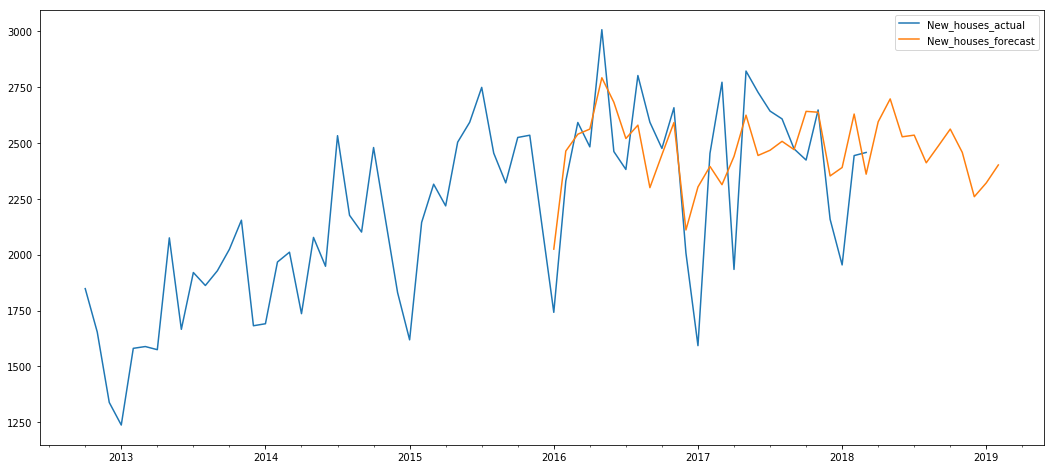

In [178]:
exogVar = final_df.loc[:'2018-03-31',['Purchase of real property']]
exogVar_lag12 = exogVar.shift(correlpurchasemax,freq='MS')
exogVar_lag12_for_model = exogVar_lag12.loc['2012-09-30':'2018-03-31']
exogVar_lag12_forecast = exogVar_lag12.loc['2018-03-31':'2019-02-28']


approved_houses = final_df.loc[:'2018-03-31',['Approved houses']]
approved_houses = approved_houses.loc['2012-09-30':'2018-03-31']



order_of_intergration = range(0, 2)
AR_model_order  = range(0, 2)
MA_model_order = range(0, 2)
 

best_exog_model_result = find_best_model_exog_var(AR_model_order, 
                                    order_of_intergration, 
                                    MA_model_order, 
                                    approved_houses,
                                    exogVar_lag12_for_model)

model_exog = sm.tsa.statespace.SARIMAX(approved_houses, 
                                order=best_exog_model_result[0], 
                                seasonal_order=best_exog_model_result[1],
                                exog = exogVar_lag12_for_model,
                                trend='n')

my_model_exog = model_exog.fit()

# statistical summary
print(my_model_exog.summary())


# Prediction power 
Actual  = pd.DataFrame(approved_houses)
Actual.columns = ['New_houses_actual']
Forecast = pd.DataFrame(my_model_exog.predict(start = '2016-01-01', 
                                              end= '2019-02-01', 
                                              exog=exogVar_lag12_forecast, 
                                              dynamic= True))
Forecast.columns = ['New_houses_forecast']

Prediction=pd.merge(Actual, Forecast, how='outer', left_index=True, right_index=True)
Prediction.plot(figsize=(18, 8))


In [175]:
Prediction.tail(50)


,New_houses_actual,New_houses_forecast
2015-02-01,2144.0,NaN
2015-03-01,2315.0,NaN
2015-04-01,2218.0,NaN
2015-05-01,2503.0,NaN
2015-06-01,2592.0,NaN
2015-07-01,2748.0,NaN
2015-08-01,2454.0,NaN
2015-09-01,2321.0,NaN
2015-10-01,2524.0,NaN
2015-11-01,2534.0,NaN


## Result 

In the ARIMA model with exogenous variables, we calculated a high correlation between the building approvals of new houses in New South Wales series and Purchases of real property series. However, it can only predict only 11 months due to purchase series is not predicted only shifted. We should create a model for the purchase of real property series in order to forecast the approval series. Moreover, p-value of some variables is greater than 0.05 and should be omitted. 

Next steps:
- omit variables
- transform original series
- use other exogenous variables
- predict exogenous variables in order to forecast 36 months of the building approvals series

# Conclusion 

We have found that ARIMA model with purchase of real property variable as exogenous variable forecast which better copies the trend of the original series. Next step is to try both models with transformed building approvals series. We should also be aware of overfitting due to the usage of mean square error as a criterium of the best model.